# Packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Understanding the Data

## Importing the Data

In [2]:
Sales_Data = pd.read_csv('Data/Groceries_dataset.csv')
Sales_Data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Ploting the Data (Top 20 and bottom of number of item sold)

<AxesSubplot:>

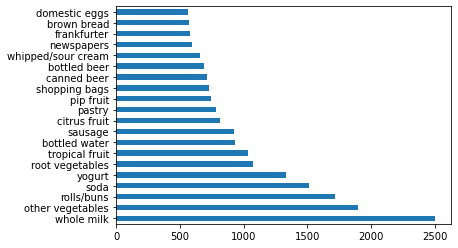

In [3]:
Sales_Data['itemDescription'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

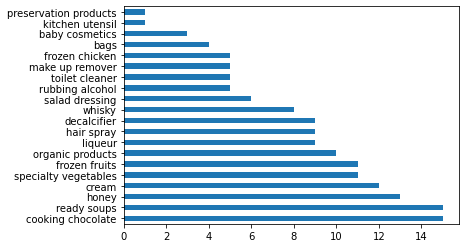

In [4]:
Sales_Data['itemDescription'].value_counts()[-20:].plot(kind='barh')

## Cleaning the Data
The data appers to be cleaned before this analysiz. No Null or N/A values. Duplicated values are allowed in the nature of the data (One customer can shop more than one sausage one one day for example)

### Checking for Null, N/A and duplicates

In [5]:
print("Total N/A values: " ,Sales_Data.isna().sum().sum())

Total N/A values:  0


In [6]:
print("Total null values: ",Sales_Data.isnull().sum().sum())

Total null values:  0


In [7]:
Duplicated_rows = Sales_Data[Sales_Data.duplicated(keep=False)]
print("Number of duplicated rows: ", Duplicated_rows.shape)

Number of duplicated rows:  (1491, 3)


In [8]:
Duplicated_rows.sort_values(by=['Date', 'Member_number', 'itemDescription']).head()

,Member_number,Date,itemDescription
3677,1235,01-01-2015,sausage
8648,1235,01-01-2015,sausage
15721,2763,01-02-2015,yogurt
19957,2763,01-02-2015,yogurt
8544,2944,01-02-2015,yogurt


# Future building and One-Hot encoding 

## Creating a invoice-number 

In [14]:
Sales_Data['Invoice_Nr'] = Sales_Data.apply (lambda row: str(row.Member_number) + row.Date , axis=1)
Sales_Data = Sales_Data[['Invoice_Nr', 'Member_number', 'Date', 'itemDescription']]
Sales_Data.sort_values(by='Invoice_Nr')

,Invoice_Nr,Member_number,Date,itemDescription
20992,100015-03-2015,1000,15-03-2015,semi-finished bread
8395,100015-03-2015,1000,15-03-2015,whole milk
24544,100015-03-2015,1000,15-03-2015,yogurt
4843,100015-03-2015,1000,15-03-2015,sausage
32851,100024-06-2014,1000,24-06-2014,salty snack
...,...,...,...,...
19727,500010-02-2015,5000,10-02-2015,root vegetables
34885,500010-02-2015,5000,10-02-2015,semi-finished bread
3578,500010-02-2015,5000,10-02-2015,soda
9340,500016-11-2014,5000,16-11-2014,bottled beer


## One-Hot Encoding

In [44]:
Sales_Data_Enc = pd.concat([Sales_Data['Invoice_Nr'],pd.get_dummies(Sales_Data['itemDescription'], prefix='ID')],axis=1)
Sales_Data_Enc = Sales_Data_Enc.drop(['Invoice_Nr'],axis=1)
Sales_Data_Enc.head()


,ID_Instant food products,ID_UHT-milk,ID_abrasive cleaner,ID_artif. sweetener,ID_baby cosmetics,ID_bags,ID_baking powder,ID_bathroom cleaner,ID_beef,ID_berries,...,ID_turkey,ID_vinegar,ID_waffles,ID_whipped/sour cream,ID_whisky,ID_white bread,ID_white wine,ID_whole milk,ID_yogurt,ID_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Analyzis - Apriori Algorithm

In [50]:
frequent_itemsets = apriori(Sales_Data_Enc, min_support=0.10, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set